## Multiple Linear regression

### Housing Case Study

#### Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

#### 1. Read & Understand Data

In [2]:
## import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Import Dataset

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df. shape

(545, 13)

- Price is our Target Variable (y)
- Dataset is having 13 columns & 545 rows

In [5]:
## Check other features of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### 2. Visualizing the Dataset

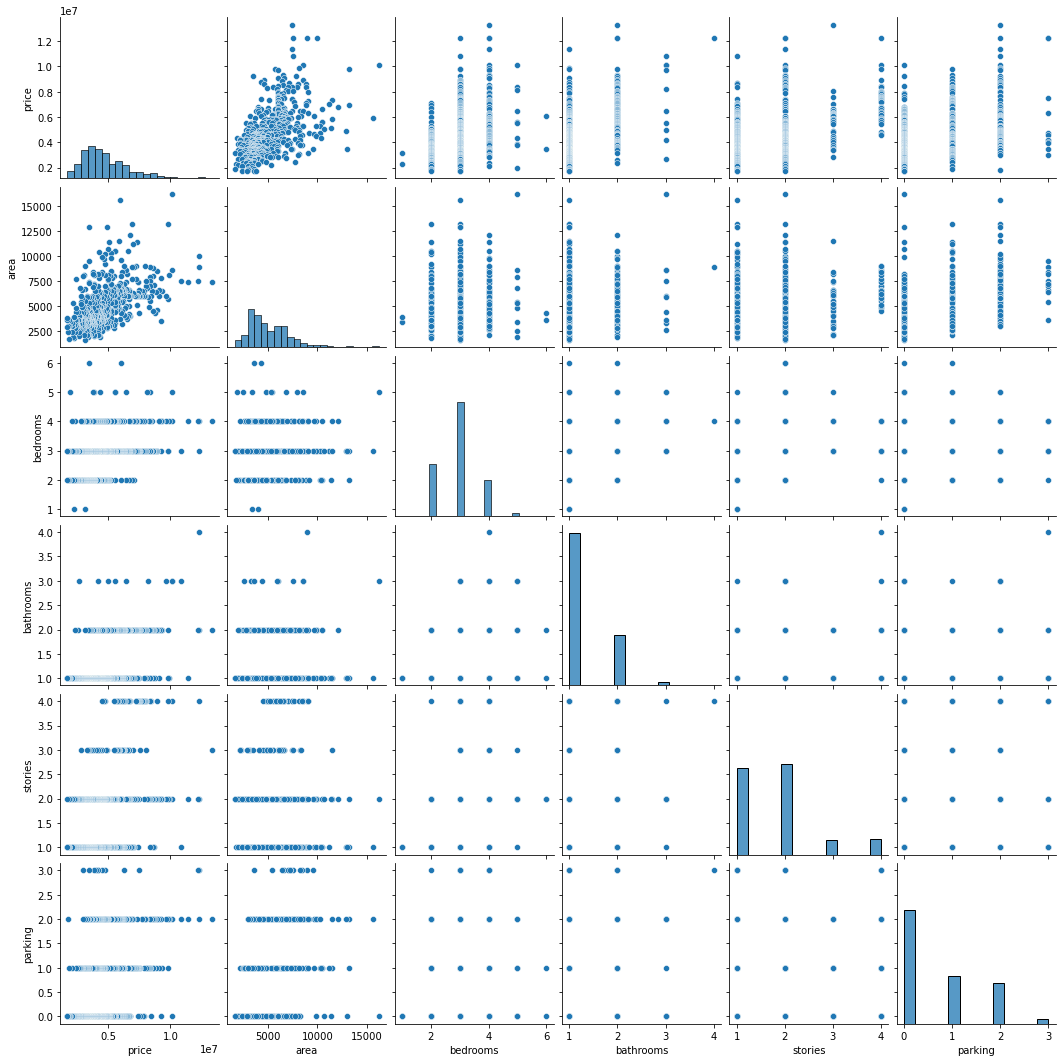

In [8]:
sns.pairplot(df)
plt.show()

We can see from above Graph that Price is having Linear relation with the Area of the house

#### Checking the Categorical Variables in the Dataset

In [12]:
cols = df.columns

In [10]:
### Get the Numeric columns

num_cols = df._get_numeric_data().columns
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [13]:
### Get list of all Categorical columns

list(set(cols) - set(num_cols))

['prefarea',
 'mainroad',
 'furnishingstatus',
 'basement',
 'airconditioning',
 'guestroom',
 'hotwaterheating']

<AxesSubplot:xlabel='hotwaterheating', ylabel='price'>

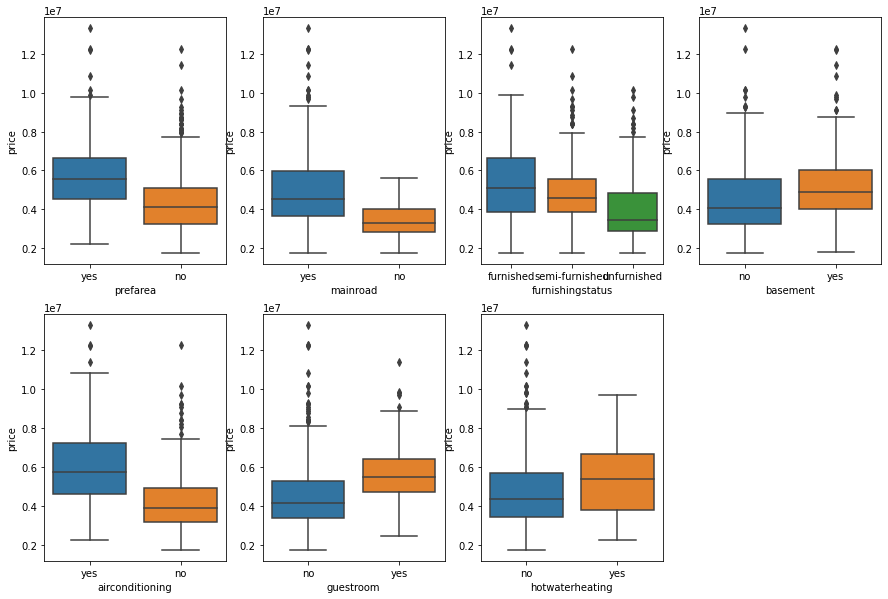

In [20]:
### Creating Boxplot for all the categorical Variables

plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
sns.boxplot(data = df, x= "prefarea", y = "price")

plt.subplot(2,4,2)
sns.boxplot(data = df, x= "mainroad", y = "price")

plt.subplot(2,4,3)
sns.boxplot(data = df, x= "furnishingstatus", y = "price")

plt.subplot(2,4,4)
sns.boxplot(data = df, x= "basement", y = "price")

plt.subplot(2,4,5)
sns.boxplot(data = df, x= "airconditioning", y = "price")

plt.subplot(2,4,6)
sns.boxplot(data = df, x= "guestroom", y = "price")

plt.subplot(2,4,7)
sns.boxplot(data = df, x= "hotwaterheating", y = "price")

#### 3. Data Preparation

In [21]:
### Channging Yes & No values in Categorical columns to 1 & 0

def binary(x):
    return x.map({"yes":1, "no":0})

varlist = ['prefarea',
 'mainroad',
 'basement',
 'airconditioning',
 'guestroom',
 'hotwaterheating']

df[varlist] = df[varlist].apply(binary)

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


##### 3.2 Creating Dummy Variables for Furnishingstatus column

In [25]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [27]:
df = pd.concat([df,status],axis=1)

In [29]:
### Furnishingstatus column is no longer needed

df.drop(["furnishingstatus"],axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### 4. Splitting the Dataframe into Train & test

In [33]:
## Import Library

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=42)

In [36]:
##### Scaling the Dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,0.393333,0.378694,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,1
363,0.186667,0.132921,0.2,0.0,0.0,1,0,0,1,0,0.000000,0,1,0
370,0.180000,0.180756,0.2,0.0,0.0,1,0,0,0,1,0.666667,0,1,0
31,0.633333,0.367698,0.4,0.0,1.0,1,0,0,0,1,0.666667,0,1,0
113,0.412667,0.547766,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,0


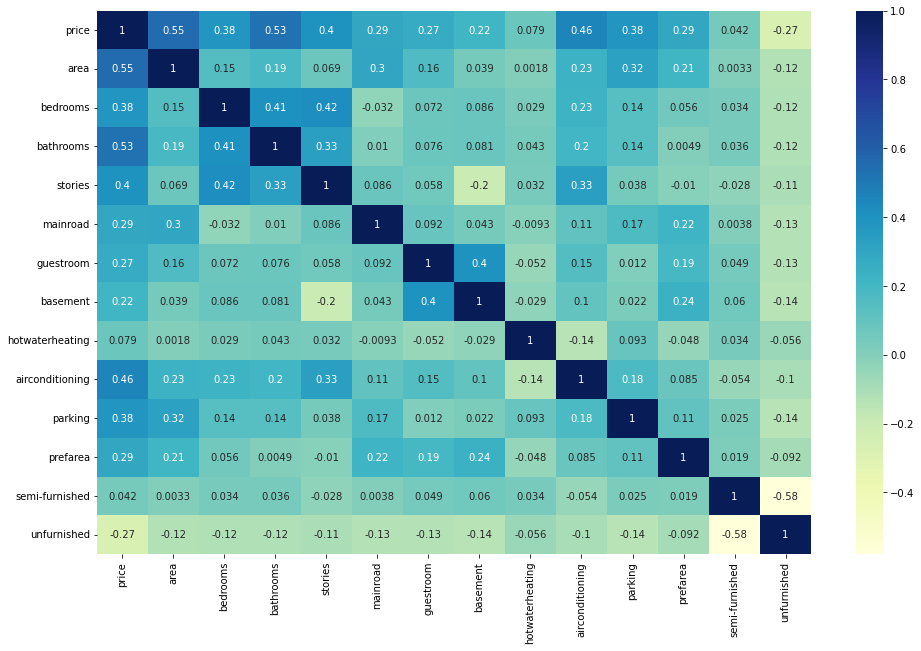

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that Price is having strong correlation with Variables like Bedrooms, Airconditioning, bathrooms

Dividing Train data into X & y dataframes for Model Building

In [44]:
y_train = df_train.pop("price")
X_train = df_train

##### 5. Building Model

In [46]:
import statsmodels.api as sm

In [48]:
X_train_lm = sm.add_constant(X_train)
X_train_lm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,1.0,0.378694,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,1
363,1.0,0.132921,0.2,0.0,0.0,1,0,0,1,0,0.000000,0,1,0
370,1.0,0.180756,0.2,0.0,0.0,1,0,0,0,1,0.666667,0,1,0
31,1.0,0.367698,0.4,0.0,1.0,1,0,0,0,1,0.666667,0,1,0
113,1.0,0.547766,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,0


In [49]:
lr1 = sm.OLS(y_train,X_train_lm).fit()
lr1.params

const              0.035869
area               0.350984
bedrooms           0.038521
bathrooms          0.318500
stories            0.119219
mainroad           0.038864
guestroom          0.026258
basement           0.045962
hotwaterheating    0.058702
airconditioning    0.065318
parking            0.086603
prefarea           0.048494
semi-furnished    -0.011586
unfurnished       -0.037256
dtype: float64

In [50]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.00e-85
Time:                        11:01:37   Log-Likelihood:                 362.28
No. Observations:                 381   AIC:                            -696.6
Df Residuals:                     367   BIC:                            -641.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0359      0.023     

##### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖 = 1 / (1 − 𝑅𝑖2) 

In [55]:
### Create a Dataframe which shows VIF for all the Variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1]) ]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.706202
4,mainroad,6.011984
0,area,4.587491
3,stories,2.862692
11,semi-furnished,2.241157
6,basement,2.171087
9,parking,1.940454
8,airconditioning,1.879053
12,unfurnished,1.822611
2,bathrooms,1.673484


As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, semi-furnished as it has a very high p-value of 0.37. Let's go ahead and drop this variables

In [56]:
X = X_train.drop(["semi-furnished"],axis=1)

In [57]:
X_train_lm = sm.add_constant(X)
lr2 = sm.OLS(y_train,X_train_lm).fit()

In [58]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.05
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.83e-86
Time:                        11:26:42   Log-Likelihood:                 361.82
No. Observations:                 381   AIC:                            -697.6
Df Residuals:                     368   BIC:                            -646.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0269      0.021     

In [59]:
### Calculate Vif again


vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.899661
4,mainroad,5.671364
0,area,4.581439
3,stories,2.846937
6,basement,2.168967
9,parking,1.939194
8,airconditioning,1.862691
2,bathrooms,1.669189
5,guestroom,1.562729
10,prefarea,1.503530


Bedrooms Column has high VIF as well as high P value, therefore we can drop it

In [60]:
X = X.drop(["bedrooms"], axis=1)

In [61]:
X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train,X_train_lm).fit()

In [62]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     75.24
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.31e-87
Time:                        11:35:55   Log-Likelihood:                 361.32
No. Observations:                 381   AIC:                            -698.6
Df Residuals:                     369   BIC:                            -651.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0393      0.016     

In [63]:
### Calculate Vif again


vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.939612
0,area,4.354711
2,stories,2.357399
5,basement,1.987757
8,parking,1.921483
7,airconditioning,1.862347
1,bathrooms,1.591340
4,guestroom,1.557138
9,prefarea,1.502845
10,unfurnished,1.320738


Dropping Guestroom as it has high P-value

In [64]:
X = X.drop(["guestroom"], axis=1)

In [65]:
X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     81.94
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.79e-87
Time:                        11:40:40   Log-Likelihood:                 359.63
No. Observations:                 381   AIC:                            -697.3
Df Residuals:                     370   BIC:                            -653.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0380      0.016     

In [67]:
# Calculate Vif again


vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.937171
0,area,4.290110
2,stories,2.328449
7,parking,1.913394
6,airconditioning,1.859117
4,basement,1.697989
1,bathrooms,1.590088
8,prefarea,1.494469
9,unfurnished,1.312971
5,hotwaterheating,1.098037


#### Residual Analysis using train data

In [68]:
y_train_price = lr3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

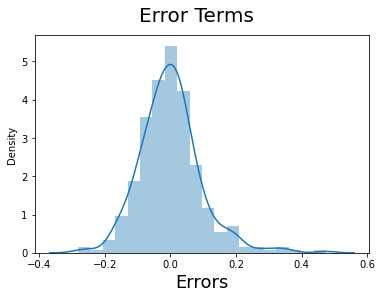

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                  

##### Making Predictions using Model

In [71]:
### Appliying Scaling on Test data

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
y_test = df_test.pop('price')
X_test = df_test

In [73]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [74]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "guestroom"], axis = 1)

In [75]:
y_pred_m4 = lr3.predict(X_test_m4)

##### Model Evaluation

Text(0, 0.5, 'y_pred')

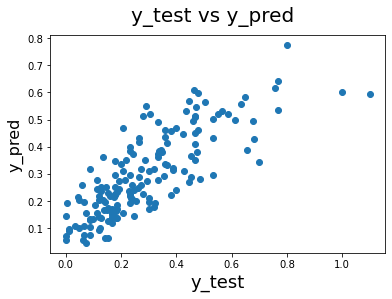

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      